# Importing Necessary Libraries

In [1]:
#Basic Libraries
import numpy as np
import pandas as pd

In [2]:
#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#Text Handling Libraries
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

# Data Loading and Cleaning

In [4]:
df = pd.read_csv('BigBasket Products.csv',index_col='index')

In [5]:
df.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
index,,,,,,,,,
1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [6]:
df.shape

(27555, 9)

In [7]:
df.isnull().sum()

product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64

In [8]:
print('Percentage Null Data In Each Column')
print('-'*30)
for col in df.columns:
    null_count = df[col].isnull().sum()
    total_count = df.shape[0]
    print("{} : {:.2f}".format(col,null_count/total_count * 100))

Percentage Null Data In Each Column
------------------------------
product : 0.00
category : 0.00
sub_category : 0.00
brand : 0.00
sale_price : 0.00
market_price : 0.00
type : 0.00
rating : 31.30
description : 0.42


In [9]:
print('Total Null Data')
null_count = df.isnull().sum().sum()
total_count = np.product(df.shape)
print("{:.2f}".format(null_count/total_count * 100))

Total Null Data
3.53


In [10]:
df = df.dropna()

In [11]:
df.isnull().sum()

product         0
category        0
sub_category    0
brand           0
sale_price      0
market_price    0
type            0
rating          0
description     0
dtype: int64

In [12]:
df.shape

(18840, 9)

# Exploratory Data Analysis

In [13]:
df.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
index,,,,,,,,,
1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [14]:
counts = df['category'].value_counts()

counts_df = pd.DataFrame({'Category':counts.index,'Counts':counts.values})

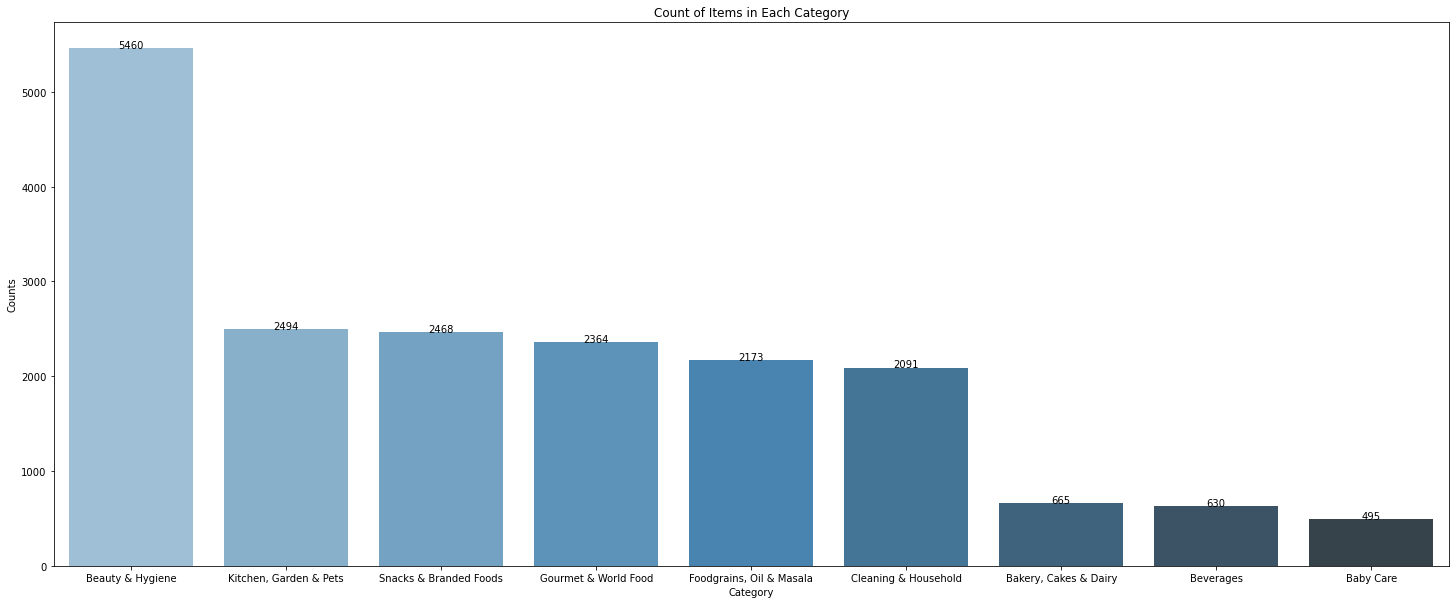

In [15]:
plt.figure(figsize=(25, 10))
bar_plot = sns.barplot(data=counts_df, x='Category', y='Counts', palette='Blues_d')

for index, row in counts_df.iterrows():
    bar_plot.text(row.name, row.Counts + 1, round(row.Counts, 2), color='black', ha="center")
    
plt.title('Count of Items in Each Category')

plt.show()

In [16]:
counts = df['sub_category'].value_counts()

counts_df_1 = pd.DataFrame({'Category':counts.index,'Counts':counts.values})[:10]

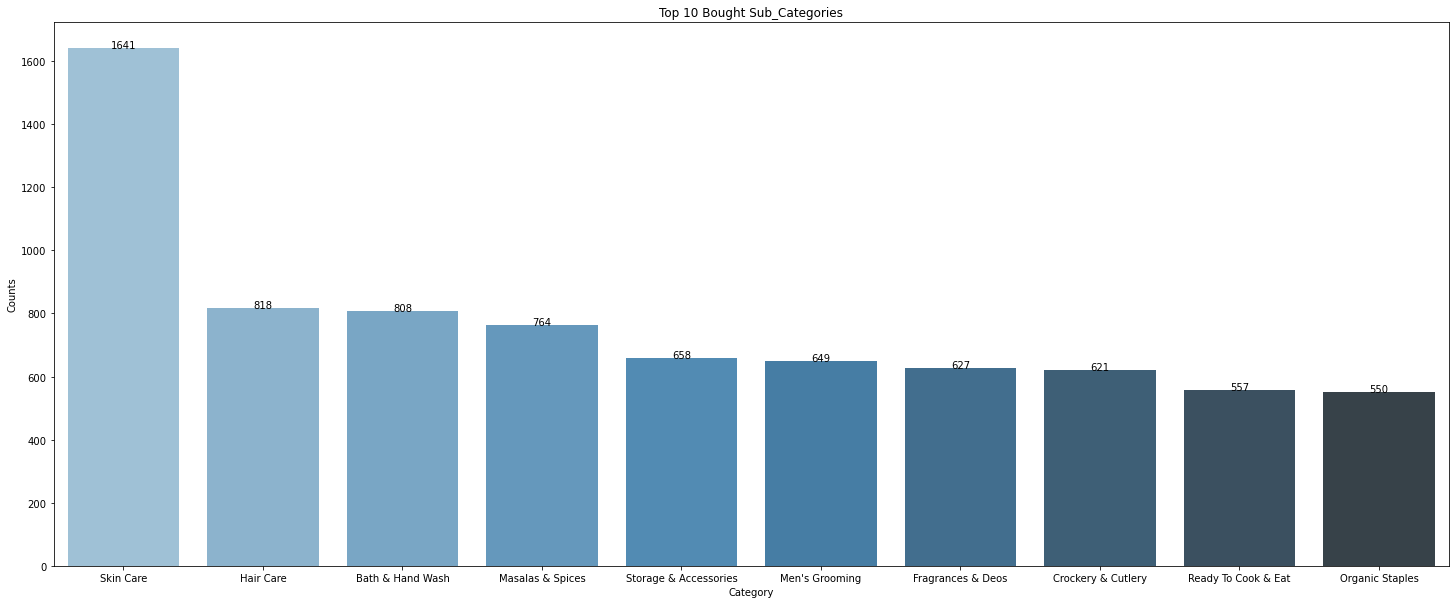

In [17]:
plt.figure(figsize=(25, 10))
bar_plot = sns.barplot(data=counts_df_1, x='Category', y='Counts', palette='Blues_d')

for index, row in counts_df_1.iterrows():
    bar_plot.text(index, row.Counts, round(row.Counts, 2), color='black', ha="center")
    
plt.title('Top 10 Bought Sub_Categories')

plt.show()

In [18]:
counts = df['type'].value_counts()

counts_df_type = pd.DataFrame({'Type':counts.index,'Counts':counts.values})[:10]

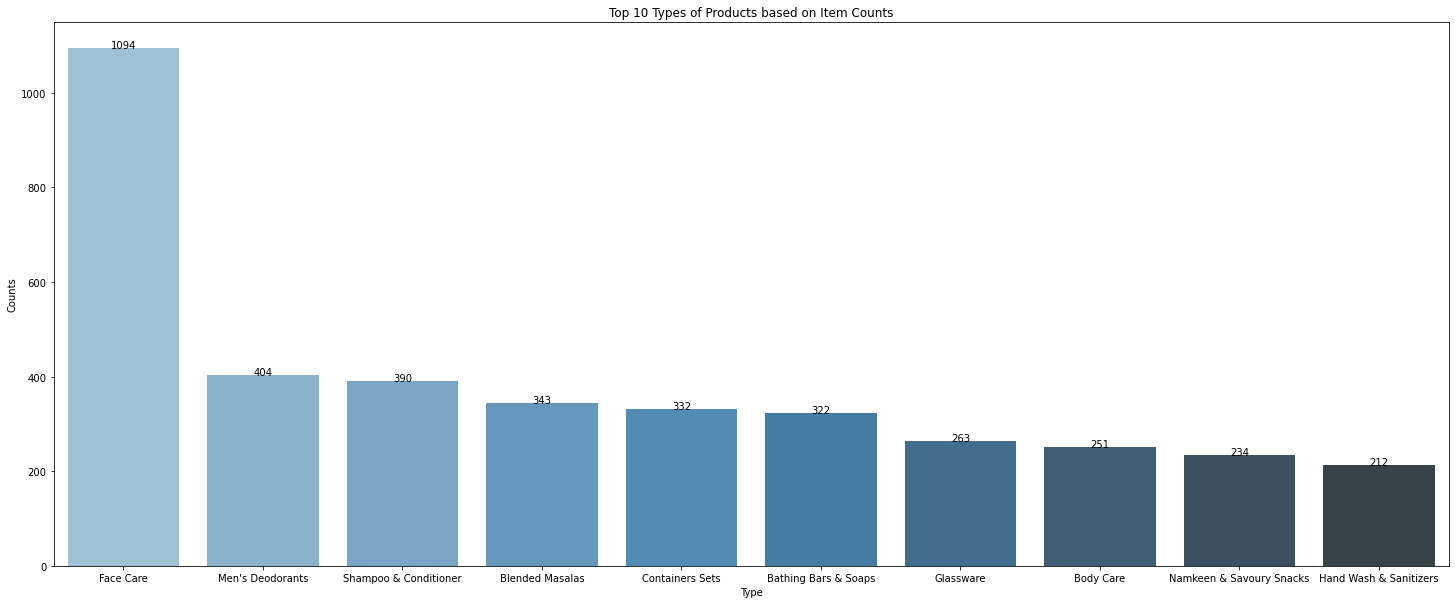

In [19]:
plt.figure(figsize=(25, 10))
bar_plot = sns.barplot(data=counts_df_type, x='Type', y='Counts', palette='Blues_d')

for index, row in counts_df_type.iterrows():
    bar_plot.text(index, row.Counts, round(row.Counts, 2), color='black', ha="center")
    
plt.title('Top 10 Types of Products based on Item Counts')

plt.show()

# Popularity-Based Recommendor

In [20]:
def sort_recommendor(col='rating',sort_type = False):
    """
    A recommendor based on sorting products on the column passed.
    Arguments to be passed:
    
    col: The Feature to be used for recommendation.
    sort_type: True for Ascending Order
    """
    rated_recommend = df.copy()
    if rated_recommend[col].dtype == 'O':
        col='rating'
    rated_recommend = rated_recommend.sort_values(by=col,ascending = sort_type)
    return rated_recommend[['product','brand','sale_price','rating']].head(10)

In [21]:
help(sort_recommendor)

Help on function sort_recommendor in module __main__:

sort_recommendor(col='rating', sort_type=False)
    A recommendor based on sorting products on the column passed.
    Arguments to be passed:
    
    col: The Feature to be used for recommendation.
    sort_type: True for Ascending Order



In [22]:
sort_recommendor(col='sale_price',sort_type=True)

,product,brand,sale_price,rating
index,,,,
21313,Serum,Livon,3.0,2.5
18291,Sugar Coated Chocolate,Cadbury Gems,5.0,4.2
21229,Dish Shine Bar,Exo,5.0,4.2
14539,Cadbury Perk - Chocolate Bar,Cadbury,5.0,4.2
19539,Layer Cake - Chocolate,Winkies,5.0,4.2
2979,Sugar Free Chewing Gum - Mixed Fruit,Orbit,5.0,4.2
15927,Dreams Cup Cake - Choco,Elite,5.0,3.9
6015,Good Day Butter Cookies,Britannia,5.0,4.1
27414,Layer Cake - Orange,Winkies,5.0,4.1


In [23]:
C= df['rating'].mean()
C

3.943062632696396

In [24]:
def sort_recommendor(col='rating',sort_type = False):
    """
    A recommendor based on sorting products on the column passed.
    Arguments to be passed:
    
    col: The Feature to be used for recommendation.
    sort_type: True for Ascending Order
    """
    rated_recommend = df.copy().loc[df['rating'] >= 3.5]
    if rated_recommend[col].dtype == 'O':
        col='rating'
    rated_recommend = rated_recommend.sort_values(by=col,ascending = sort_type)
    return rated_recommend[['product','brand','sale_price','rating']].head(10)

In [25]:
sort_recommendor(col='sale_price',sort_type=True)

,product,brand,sale_price,rating
index,,,,
2762,Orbit Sugar-Free Chewing Gum - Lemon & Lime,Wrigleys,5.0,4.2
3446,Marie Light Biscuits - Active,Sunfeast,5.0,4.5
14604,50-50 Timepass Biscuits,Britannia,5.0,3.9
17641,Hand Wash - Moisture Shield,Savlon,5.0,4.4
27491,50-50 Timepass Salted Biscuits,Britannia,5.0,4.2
26585,Polo - The Mint With The Hole,Nestle,5.0,4.4
2979,Sugar Free Chewing Gum - Mixed Fruit,Orbit,5.0,4.2
19539,Layer Cake - Chocolate,Winkies,5.0,4.2
19203,Bounce Biscuits - Choco Creme,Sunfeast,5.0,4.2


# Content Based Recommendor

In [26]:
df.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
index,,,,,,,,,
1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [27]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['description'])
tfidf_matrix.shape

(18840, 23342)

In [28]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.01632718, 0.00999603, ..., 0.01056047, 0.01133156,
        0.        ],
       [0.01632718, 1.        , 0.00719713, ..., 0.        , 0.        ,
        0.        ],
       [0.00999603, 0.00719713, 1.        , ..., 0.00635776, 0.        ,
        0.        ],
       ...,
       [0.01056047, 0.        , 0.00635776, ..., 1.        , 0.        ,
        0.        ],
       [0.01133156, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [29]:
indices = pd.Series(df.index, index=df['product']).drop_duplicates()

def get_recommendations_1(title, cosine_sim=cosine_sim):
    
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df['product'].iloc[movie_indices]

In [30]:
get_recommendations_1('Water Bottle - Orange')

index
1677         Brass Nanda Stand Goblets - No.1
2162         Brass Kachua Stand Deepam - No.1
2756     Brass Angle Deep Stand - Plain, No.2
5400       Brass Lakshmi Deepam - Plain, No.2
6520                Brass Kuber Deepam - No.1
10504               Brass Kuber Deepam - No.2
11226    Brass Angle Deep Stand - Plain, No.3
11504    Brass Angle Deep Stand - Plain, No.1
12699        Brass Kachua Stand Deepam - No.2
18572               Brass Kuber Deepam - No.3
Name: product, dtype: object

In [31]:
get_recommendations_1('Cadbury Perk - Chocolate Bar')

index
27049                        Pickle - Mixed
6601                  Pickle - Kaduku Mango
17934                Pickle - Mix Vegetable
27105                        Pickle - Prawn
3962                  Pickle - Tender Mango
16875             Olive Oil - Carrot Pickle
3444                     Pickle - Cut Mango
17237      Andhra Special Red Chilli Pickle
27234    Pickle - Lime (South Indian Style)
4955                    Pickle - Gooseberry
Name: product, dtype: object

In [32]:
df2 = df.copy()

In [33]:
df2.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
index,,,,,,,,,
1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [34]:
df2.shape

(18840, 9)

In [35]:
rmv_spc = lambda a:a.strip()
get_list = lambda a:list(map(rmv_spc,re.split('& |, |\*|\n', a)))

In [36]:
get_list('A & B, C')

['A', 'B', 'C']

In [37]:
for col in ['category', 'sub_category', 'type']:
    df2[col] = df2[col].apply(get_list)

In [38]:
df2.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
index,,,,,,,,,
1,Garlic Oil - Vegetarian Capsule 500 mg,"[Beauty, Hygiene]",[Hair Care],Sri Sri Ayurveda,220.0,220.0,"[Hair Oil, Serum]",4.1,This Product contains Garlic Oil that is known...
2,Water Bottle - Orange,"[Kitchen, Garden, Pets]","[Storage, Accessories]",Mastercook,180.0,180.0,"[Water, Fridge Bottles]",2.3,"Each product is microwave safe (without lid), ..."
3,"Brass Angle Deep - Plain, No.2","[Cleaning, Household]",[Pooja Needs],Trm,119.0,250.0,"[Lamp, Lamp Oil]",3.4,"A perfect gift for all occasions, be it your m..."
4,Cereal Flip Lid Container/Storage Jar - Assort...,"[Cleaning, Household]","[Bins, Bathroom Ware]",Nakoda,149.0,176.0,"[Laundry, Storage Baskets]",3.7,Multipurpose container with an attractive desi...
5,Creme Soft Soap - For Hands & Body,"[Beauty, Hygiene]","[Bath, Hand Wash]",Nivea,162.0,162.0,"[Bathing Bars, Soaps]",4.4,Nivea Creme Soft Soap gives your skin the best...


In [39]:
def cleaner(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [40]:
for col in ['category', 'sub_category', 'type','brand']:
    df2[col] = df2[col].apply(cleaner)

In [41]:
df2.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
index,,,,,,,,,
1,Garlic Oil - Vegetarian Capsule 500 mg,"[beauty, hygiene]",[haircare],srisriayurveda,220.0,220.0,"[hairoil, serum]",4.1,This Product contains Garlic Oil that is known...
2,Water Bottle - Orange,"[kitchen, garden, pets]","[storage, accessories]",mastercook,180.0,180.0,"[water, fridgebottles]",2.3,"Each product is microwave safe (without lid), ..."
3,"Brass Angle Deep - Plain, No.2","[cleaning, household]",[poojaneeds],trm,119.0,250.0,"[lamp, lampoil]",3.4,"A perfect gift for all occasions, be it your m..."
4,Cereal Flip Lid Container/Storage Jar - Assort...,"[cleaning, household]","[bins, bathroomware]",nakoda,149.0,176.0,"[laundry, storagebaskets]",3.7,Multipurpose container with an attractive desi...
5,Creme Soft Soap - For Hands & Body,"[beauty, hygiene]","[bath, handwash]",nivea,162.0,162.0,"[bathingbars, soaps]",4.4,Nivea Creme Soft Soap gives your skin the best...


In [42]:
def couple(x):
    return ' '.join(x['category']) + ' ' + ' '.join(x['sub_category']) + ' '+x['brand']+' ' +' '.join( x['type'])
df2['soup'] = df2.apply(couple, axis=1)

In [43]:
df2['soup'].head()

index
1    beauty hygiene haircare srisriayurveda hairoil...
2    kitchen garden pets storage accessories master...
3       cleaning household poojaneeds trm lamp lampoil
4    cleaning household bins bathroomware nakoda la...
5    beauty hygiene bath handwash nivea bathingbars...
Name: soup, dtype: object

In [44]:
df2.to_csv('data_cleaned_1.csv')

In [45]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [46]:
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)
cosine_sim2

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.27216553],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.27216553, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [47]:
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['product'])

In [48]:
def get_recommendations_2(title, cosine_sim=cosine_sim):
    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:11]

    movie_indices = [i[0] for i in sim_scores]

    return df2['product'].iloc[movie_indices]

In [49]:
old_rec = get_recommendations_1('Water Bottle - Orange').values
new_rec = get_recommendations_2('Water Bottle - Orange', cosine_sim2).values

pd.DataFrame({'Old Recommendor': old_rec,'New Recommendor':new_rec})

,Old Recommendor,New Recommendor
0,"Rectangular Plastic Container - With Lid, Mult...",Glass Water Bottle - Aquaria Organic Purple
1,"Jar - With Lid, Yellow",Glass Water Bottle With Round Base - Transpare...
2,"Round & Flat Storage Container - With lid, Green",H2O Unbreakable Water Bottle - Pink
3,Premium Rectangular Plastic Container With Lid...,Water Bottle H2O Purple
4,Premium Round Plastic Container With Lid - Yellow,H2O Unbreakable Water Bottle - Green
5,Premium Rectangular Plastic Container With Lid...,Regel Tritan Plastic Sports Water Bottle - Black
6,Premium Round & Flat Storage Container With Li...,Apsara 1 Water Bottle - Assorted Colour
7,Premium Round Plastic Container With Lid - Blue,"Glass Water Bottle With Round Base - Yellow, B..."
8,Premium Round Plastic Container With Lid - Mul...,Trendy Stainless Steel Bottle With Steel Cap -...
9,Premium Round Plastic Container With Lid - Pink,"Penta Plastic Pet Water Bottle - Violet, Wide ..."


In [50]:
old_rec = get_recommendations_1('Cadbury Perk - Chocolate Bar').values
new_rec = get_recommendations_2('Cadbury Perk - Chocolate Bar', cosine_sim2).values

pd.DataFrame({'Old Recommendor': old_rec,'New Recommendor':new_rec})

,Old Recommendor,New Recommendor
0,Cadbury Perk - Chocolate Bar,Nutties Chocolate Pack
1,Choco Stick - Hexagon Pack,5 Star Chocolate Bar
2,Luvit Chocwich White Home Delights 187 g,Dairy Milk Silk - Hazelnut Chocolate Bar
3,Luvit Chocwich Home Delights 187 g,"Perk - Chocolate, Home Treats, 175.5 g, 27 Units"
4,Wafer Biscuits - Chocolate Flavor,Dark Milk Chocolate Bar
5,Drinking Chocolate - Original,Dairy Milk Silk Mousse - Chocolate Bar
6,Drinking Chocolate - Original,Dark Milk Chocolate Bar
7,Biscuit - Bourbon Creams,Chocolate Bar - Fuse
8,Wafers With Hazelnut Cream,Choclairs Gold Coffee
9,Choco Stick - Chocolate,"5 Star Chocolate Home Pack, 200 g, 20 units"


In [51]:
old_rec = get_recommendations_1('Salted Pumpkin').values
new_rec = get_recommendations_2('Salted Pumpkin', cosine_sim2).values

pd.DataFrame({'Old Recommendor': old_rec,'New Recommendor':new_rec})

,Old Recommendor,New Recommendor
0,Gluten-Free Ragi Atta,Berries With Twist
1,Crunchy Soya Chips,Flax Seeds - Roasted
2,Magic Sabji Masala,Til Dil Seeds
3,Gluten-Free Moong Dal Cheela/Dosa Mix,Raw Seeds - Sunflower Pumpkin Flax Seeds
4,Homemade Chutney Powder,Coated Green Peas - Wasabi
5,Healthy Atta,Honey Sunflower
6,Gluten-Free 4 Lentil Dosa Mix,Premium Raw Organic Authentic Flaxseeds
7,Authentic Rasam Powder,Roasted Sunflower Pumpkin & Flax Seeds
8,Masala Poori Atta,Premium Raw Organic Holy Basil Seeds
9,Bhatura Atta,"Harippa Roasted Seeds - Pumpkin, Cheesy Onion"


In [52]:
old_rec = get_recommendations_1('Jeera Powder').values
new_rec = get_recommendations_2('Jeera Powder', cosine_sim2).values

pd.DataFrame({'Old Recommendor': old_rec,'New Recommendor':new_rec})

,Old Recommendor,New Recommendor
0,Coriander Powder,Red Chilli Powder/Menasina Pudi
1,Coriander Powder,Pani Puri Masala
2,Powder - Jeera (Cumin),Turmeric Powder/Arisina Pudi
3,Meat Masala,Coriander Powder
4,Jaljeera,Saunf/Sompu Powder
5,Raita Masala,Sprinklers - Black Pepper
6,Kitchen King,Coriander Powder
7,Turmeric Powder/Arisina Pudi,Dry Ginger Powder
8,Powder - Jeera,Amchur Powder
9,Papad - Jeera,Hing/Asafoetida
